Density-Based Spatial Clustering of Applications with Noise

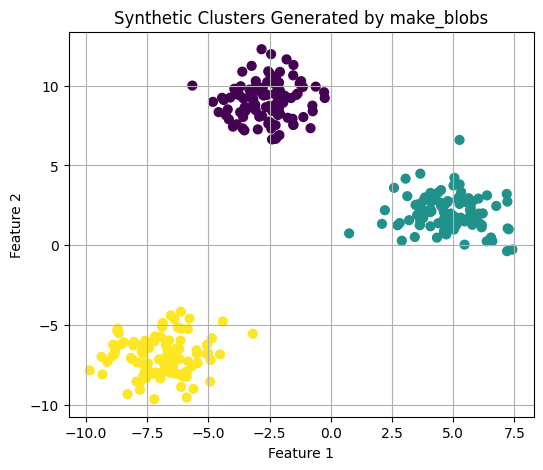

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X, y = make_blobs(
    n_samples=300,         # total points
    n_features=2,          # 2D points
    centers=3,             # 3 clusters
    cluster_std=1.2,       # spread of clusters
    center_box=(-10, 10),  # range of cluster centers
    random_state=42
)

# Plot it
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=40)
plt.title("Synthetic Clusters Generated by make_blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [11]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Cluster'] = y

In [12]:
df.head()

,Feature1,Feature2,Cluster
0,-7.430860,-7.899923,2
1,-7.912123,-7.341576,2
2,-1.522144,7.549274,0
3,4.378661,3.291702,1
4,-9.325377,-8.089813,2


array([[<Axes: title={'center': 'Feature1'}>,
        <Axes: title={'center': 'Feature2'}>],
       [<Axes: title={'center': 'Cluster'}>, <Axes: >]], dtype=object)

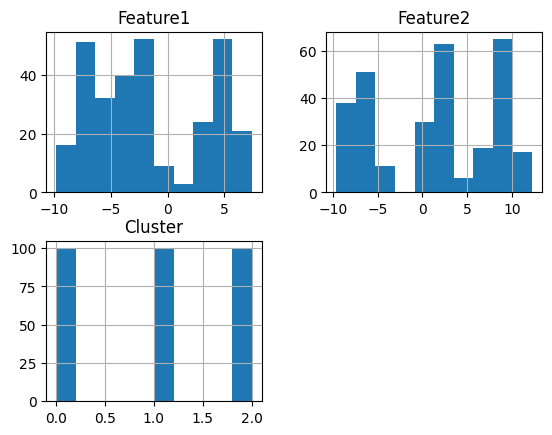

In [13]:
df.hist()

In [14]:
df.skew()

Feature1    0.302210
Feature2   -0.142904
Cluster     0.000000
dtype: float64

In [15]:
# since already near normal applying z-score
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()


df[['Feature1', 'Feature2']] = scaler.fit_transform(df[['Feature1', 'Feature2']])

print(df.head())


   Feature1  Feature2  Cluster
0 -1.178083 -1.386791        2
1 -1.275175 -1.303119        2
2  0.013973  0.928360        0
3  1.204433  0.290338        1
4 -1.560293 -1.415247        2


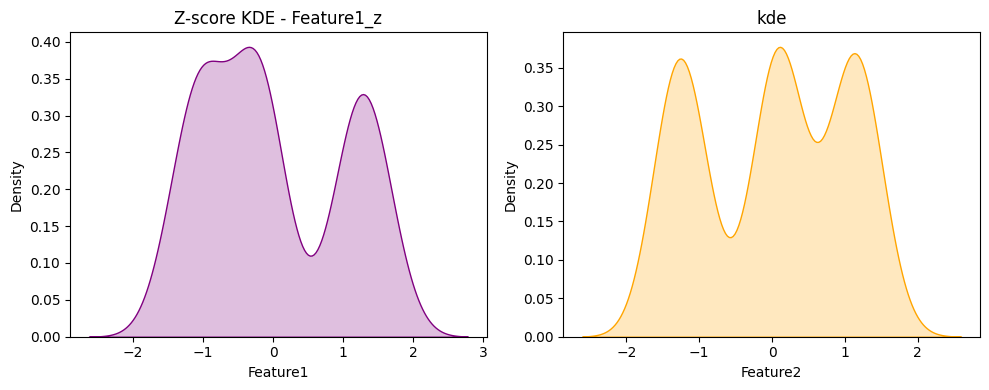

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(df['Feature1'], fill=True, color='purple')
plt.title("Z-score KDE - Feature1_z")

plt.subplot(1, 2, 2)
sns.kdeplot(df['Feature2'], fill=True, color='orange')
plt.title("kde")

plt.tight_layout()
plt.show()


In [20]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

X = df[['Feature1', 'Feature2']]  
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples_range = range(3, 10)

best_score = -1
best_params = {}
best_labels = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        if len(set(labels)) > 1 and len(set(labels)) < len(X):  # avoid trivial solutions
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_labels = labels


In [21]:
print("Best DBSCAN Params:", best_params)
print("Best Silhouette Score:", best_score)

df['DBSCAN_cluster'] = best_labels


Best DBSCAN Params: {'eps': 0.4, 'min_samples': 3}
Best Silhouette Score: 0.8182412709664815


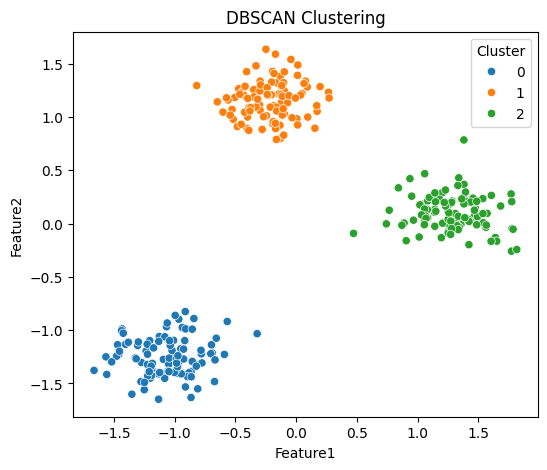

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.scatterplot(x='Feature1', y='Feature2', hue='DBSCAN_cluster', data=df, palette='tab10')
plt.title("DBSCAN Clustering")
plt.legend(title='Cluster')
plt.show()
